<a href="https://colab.research.google.com/github/souldrive7/ECP/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost

In [1]:
from xgboost import XGBClassifier
from sklearn.datasets import fetch_openml  # データセットのダウンロード取得用
import pandas as pd  # データフレーム操作用
import matplotlib.pyplot as plt  # グラフ描画用

In [2]:
# 1. データセットの取得
dataset = fetch_openml("pima-indians-diabetes", version=1, as_frame=True)  # Pimaデータセットを取得
# こんな感じのデータです．8変数の説明変数．Outcomeは0 or 1
dataset.frame.head()  # データフレームの最初の5行を表示

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [3]:
# 1.1 参考までに相関行列を表示
corr = dataset.frame.corr()
# 相関行列をヒートマップで表示．有効数字2桁
corr.style.format(precision=2).background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [4]:
# dfコピー
df_add_rn = df.copy()

# ランダムノイズ列を追加
df_add_rn["noise"] = np.random.randn(len(df_add_rn))

NameError: name 'df' is not defined

In [6]:
# Outcomeをドロップ
df = dataset.frame
X = df.drop(columns=["Outcome"])  # Outcome列を除外
y = df["Outcome"].astype(int)  # Outcome列を抽出 & 整数型に変換

# Outcomeをドロップ
df_add_rn = dataset.frame
X1 = df_add_rn.drop(columns=["Outcome"])  # Outcome列を除外
y1 = df_add_rn["Outcome"].astype(int)  # Outcome列を抽出 & 整数型に変換


In [8]:
# 3. 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split  # データ分割用
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)  # 80%訓練，20%テスト

# 3. 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split  # データ分割用
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=500)  # 80%訓練，20%テスト

In [9]:
# 4. xgboostを使って学習
model = XGBClassifier(
    n_estimators=100,  # 木の数
    max_depth=3,  # 木の深さ
    learning_rate=0.1,  # 学習率
    random_state=100,  # 再現性のための乱数シード
)
model.fit(X_train, y_train)  # 訓練データで学習


# 4. xgboostを使って学習
model = XGBClassifier(
    n_estimators=100,  # 木の数
    max_depth=3,  # 木の深さ
    learning_rate=0.1,  # 学習率
    random_state=100,  # 再現性のための乱数シード
)
model.fit(X_train1, y_train1)  # 訓練データで学習

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [11]:
# 5. テストデータで予測
y_pred = model.predict(X_test)  # 予測
# 6. 精度を評価
from sklearn.metrics import accuracy_score  # 精度評価用
accuracy = accuracy_score(y_test, y_pred)  # 精度計算
print(f"Accuracy: {accuracy:.3f}")  # 精度を表示(小数点以下3桁)

# 5. テストデータで予測
y_pred1 = model.predict(X_test1)  # 予測
# 6. 精度を評価
from sklearn.metrics import accuracy_score  # 精度評価用
accuracy1 = accuracy_score(y_test1, y_pred1)  # 精度計算
print(f"Accuracy1: {accuracy:.3f}")  # 精度を表示(小数点以下3桁)

Accuracy: 0.786
Accuracy1: 0.786


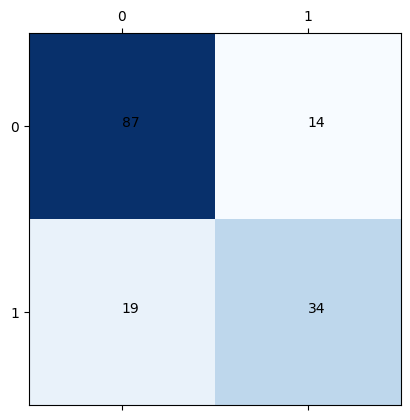

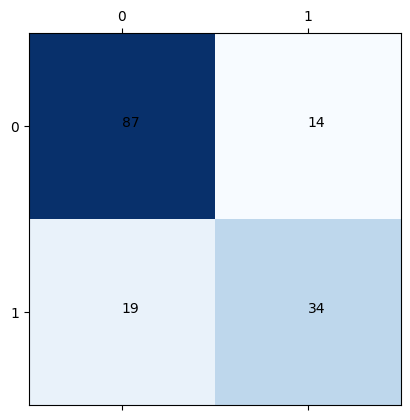

In [12]:
# 7. 混同行列を表示
from sklearn.metrics import confusion_matrix  # 混同行列用
cm = confusion_matrix(y_test, y_pred)  # 混同行列を計算
plt.matshow(cm, cmap="Blues")  # 混同行列をヒートマップで表示
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j])

# 7. 混同行列を表示
from sklearn.metrics import confusion_matrix  # 混同行列用
cm1 = confusion_matrix(y_test1, y_pred1)  # 混同行列を計算
plt.matshow(cm1, cmap="Blues")  # 混同行列をヒートマップで表示
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j])

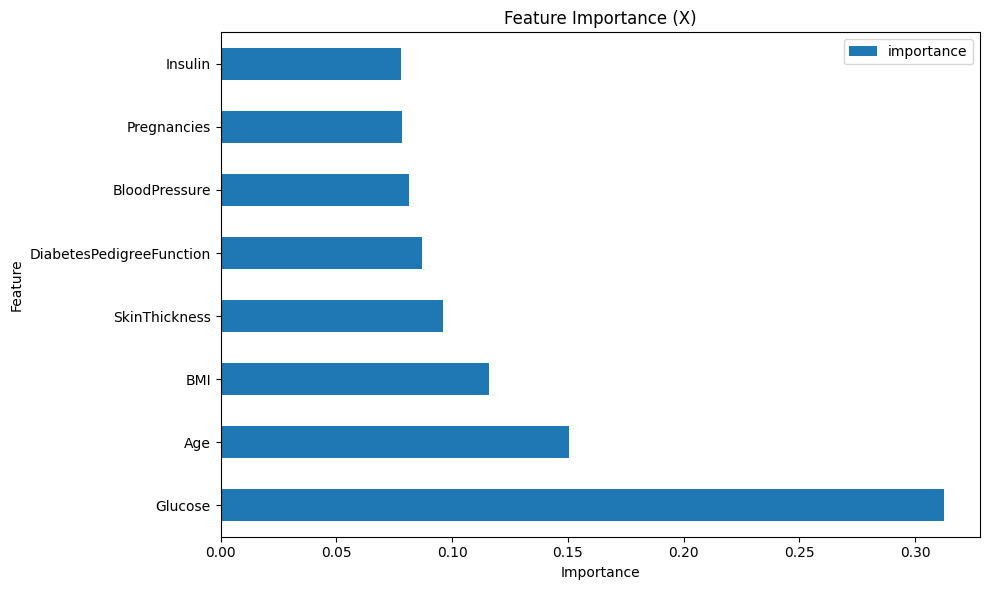

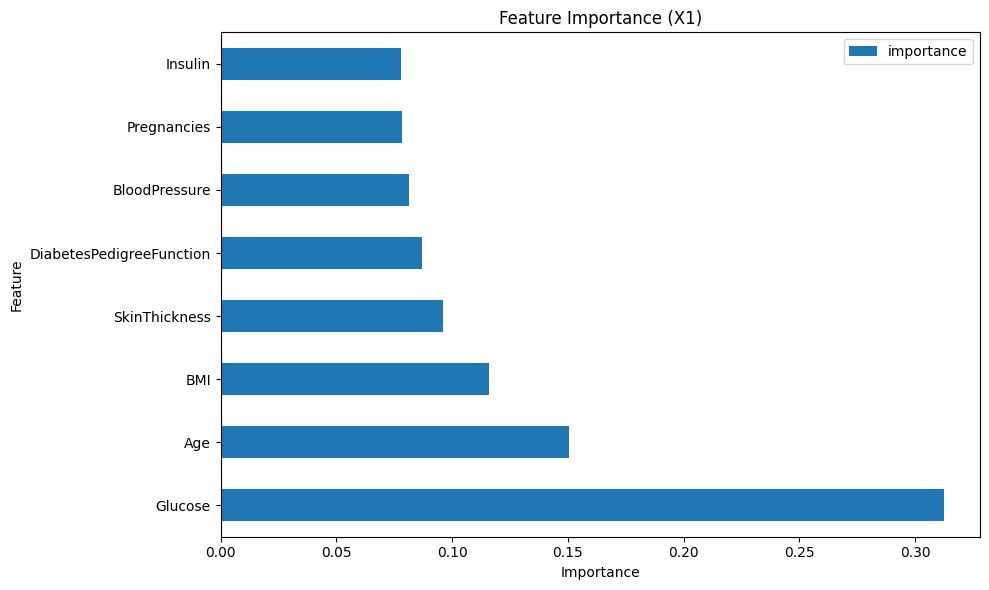

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# === 8. 元データ (X) に対する特徴量重要度 ===
importances    = model.feature_importances_  # 特徴量重要度を取得
importance_df  = pd.DataFrame({
    "feature":    X.columns,
    "importance": importances,
}).sort_values(by="importance", ascending=False)

# プロット
fig, ax = plt.subplots(figsize=(10, 6))
importance_df.plot(
    kind="barh",
    x="feature",
    y="importance",
    title="Feature Importance (X)",
    ax=ax
)
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()


# === 9. ノイズ入りなど別データ (X1) に対する特徴量重要度 ===
# （事前に model を X1, y で再学習しておく）
importances1    = model.feature_importances_  # 再学習済み model の重要度
importance_df1  = pd.DataFrame({
    "feature":    X1.columns,
    "importance": importances1,
}).sort_values(by="importance", ascending=False)

# プロット
fig, ax = plt.subplots(figsize=(10, 6))
importance_df1.plot(
    kind="barh",
    x="feature",
    y="importance",
    title="Feature Importance (X1)",
    ax=ax
)
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()


In [14]:
# おまけ

# ipywidgetで dataset.feature_namesの8変数をスライダーで指定して，その変数の値を使って予測する
# 9. ipywidgetでスライダーを作成
from ipywidgets import interact, FloatSlider  # スライダー作成用
import numpy as np  # 数値計算用

# スライダーの範囲を指定
def create_slider(name, min_value, max_value):
    return FloatSlider(value=(min_value + max_value) / 2, min=min_value, max=max_value, step=0.1, description=name)

# スライダーの値を使って予測する関数
def predict_with_sliders(**kwargs):
    # スライダーの値を使って予測
    input_data = pd.DataFrame({name: [kwargs[name]] for name in dataset.feature_names})
    prediction = model.predict_proba(input_data)  # 確率(ぽい何か)を予測
    print(f"Prediction: {prediction[0][1]:.2f}")  # 予測結果を表示

# スライダーを作成
sliders = {name: create_slider(name, X[name].min(), X[name].max()) for name in dataset.feature_names}  # スライダーを作成

# スライダーを表示
interact(predict_with_sliders, **sliders)  # スライダーを表示


interactive(children=(FloatSlider(value=8.5, description='Pregnancies', max=17.0), FloatSlider(value=99.5, des…

<function __main__.predict_with_sliders(**kwargs)>

# XGBoost による特徴量重要度変化の実験

- ベースライン：元の Pima-Indian データセット
- 実験1：予測に寄与しないノイズ変数を１つ追加
- 実験2：Glucose に類似した変数を１つ追加
- 実験3：Glucose に類似した変数を10個追加
- 実験4（発展）：Age をカテゴリ変数に変換

In [21]:
# [1] ライブラリのインポート
from xgboost import XGBClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.datasets import fetch_openml  # データセットのダウンロード取得用
import pandas as pd  # データフレーム操作用
import matplotlib.pyplot as plt  # グラフ描画用

In [22]:
# [2] データ読み込み＆前処理
dataset = fetch_openml("pima-indians-diabetes", version=1, as_frame=True)
df = dataset.frame.copy()
X0 = df.drop(columns=["Outcome"])
y  = df["Outcome"].astype(int)


In [23]:
# 1. データセットの取得
dataset = fetch_openml("pima-indians-diabetes", version=1, as_frame=True)  # Pimaデータセットを取得
# こんな感じのデータです．8変数の説明変数．Outcomeは0 or 1
dataset.frame.head()  # データフレームの最初の5行を表示

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [24]:
# 1.1 参考までに相関行列を表示
corr = dataset.frame.corr()
# 相関行列をヒートマップで表示．有効数字2桁
corr.style.format(precision=2).background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


Text(0, 0.5, 'Feature')

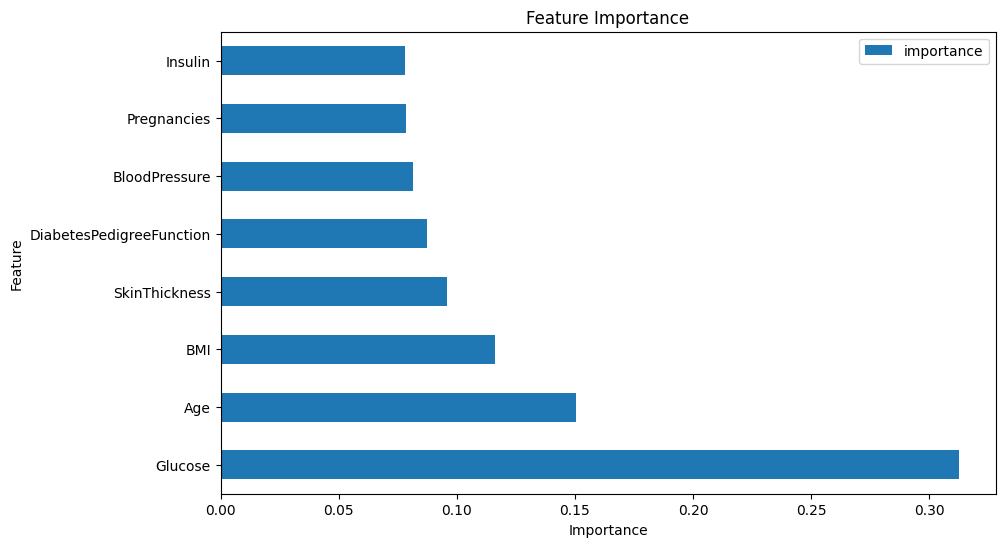

In [26]:
# 8. 特徴量の重要度を表示
importances = model.feature_importances_  # 特徴量の重要度を取得
# 特徴量の重要度をデータフレームに変換
importance_df = pd.DataFrame(
    {
        "feature": X.columns,  # 特徴量名
        "importance": importances,  # 特徴量の重要度
    }
)
importance_df = importance_df.sort_values(by="importance", ascending=False)  # 重要度でソート
# 特徴量の重要度を棒グラフで表示
importance_df.plot(
    kind="barh",  # 横棒グラフ
    x="feature",  # x軸は特徴量名
    y="importance",  # y軸は重要度
    title="Feature Importance",  # タイトル
    figsize=(10, 6),  # サイズ
)
plt.xlabel("Importance")  # x軸ラベル
plt.ylabel("Feature")  # y軸ラベル

In [30]:
# 実験1: 無関係ノイズ（ガウス乱数）を１列追加
X1 = X0.copy()
np.random.seed(0)
X1["noise"] = np.random.randn(len(X1))
imp1 = # 特徴量の重要度を棒グラフで表示
importance_df.plot(X1, y,
    kind="barh",  # 横棒グラフ
    x="feature",  # x軸は特徴量名
    y="importance",  # y軸は重要度
    title="Feature Importance",  # タイトル
    figsize=(10, 6),  # サイズ
)
print("考察: ‘noise’ の重要度はほぼゼロとなり，元の重要度分布に影響を与えていない。")

plt.xlabel("Importance")  # x軸ラベル
plt.ylabel("Feature")  # y軸ラベル
# 8. 特徴量の重要度を表示
importances = model.feature_importances_  # 特徴量の重要度を取得
# 特徴量の重要度をデータフレームに変換
importance_df = pd.DataFrame(
    {
        "feature": X.columns,  # 特徴量名
        "importance": importances,  # 特徴量の重要度
    }
)
importance_df = importance_df.sort_values(by="importance", ascending=False)  # 重要度でソート
# 特徴量の重要度を棒グラフで表示
importance_df.plot(
    kind="barh",  # 横棒グラフ
    x="feature",  # x軸は特徴量名
    y="importance",  # y軸は重要度
    title="Feature Importance",  # タイトル
    figsize=(10, 6),  # サイズ
)
plt.xlabel("Importance")  # x軸ラベル
plt.ylabel("Feature")  # y軸ラベル

SyntaxError: invalid syntax (<ipython-input-30-b04f7226e819>, line 5)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:32:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 39443 (\N{CJK UNIFIED IDEOGRAPH-9A13}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 20284 (\N{CJK UNIFIED IDEOGRAPH-4F3C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Gl

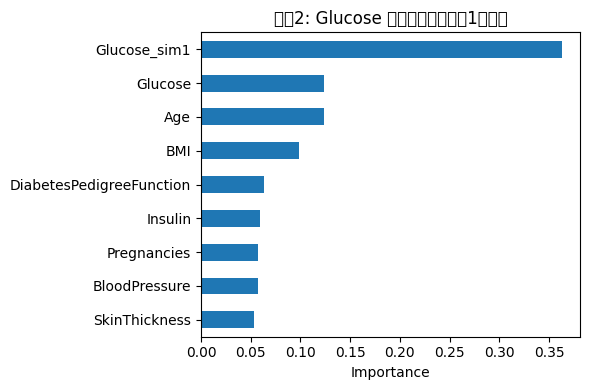

Accuracy: 0.792

考察: 重要度が Glucose と Glucose_sim1 に分散し，それぞれのスコアが低下した。


In [15]:
# 実験2: Glucose に近いノイズ変数を１列追加
X2 = X0.copy()
np.random.seed(0)
# 分散5のガウスノイズを追加
X2["Glucose_sim1"] = X2["Glucose"] + np.random.normal(scale=np.sqrt(5), size=len(X2))
imp2 = fit_and_plot(X2, y, "実験2: Glucose に類似した変数を1つ追加")
print("考察: 重要度が Glucose と Glucose_sim1 に分散し，それぞれのスコアが低下した。")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:32:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 39443 (\N{CJK UNIFIED IDEOGRAPH-9A13}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 20284 (\N{CJK UNIFIED IDEOGRAPH-4F3C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Gl

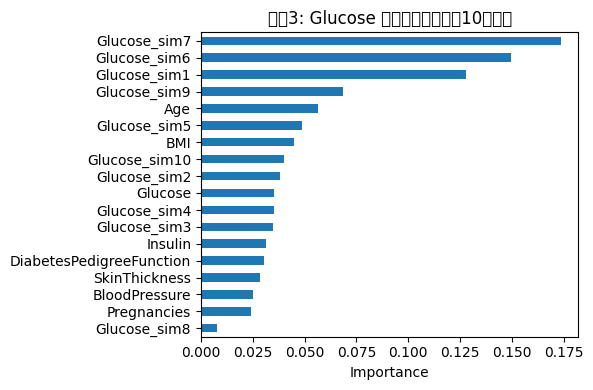

Accuracy: 0.799

考察: 元の Glucose の重要度は10個の sim 変数にさらに細かく分散し，各々の重要度が大幅に低下した。


In [16]:
# 実験3: Glucose に近いノイズ変数を10個追加
X3 = X0.copy()
np.random.seed(0)
for i in range(10):
    X3[f"Glucose_sim{i+1}"] = X3["Glucose"] + np.random.normal(scale=np.sqrt(5), size=len(X3))
imp3 = fit_and_plot(X3, y, "実験3: Glucose に類似した変数を10個追加")
print("考察: 元の Glucose の重要度は10個の sim 変数にさらに細かく分散し，各々の重要度が大幅に低下した。")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:33:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 39443 (\N{CJK UNIFIED IDEOGRAPH-9A13}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 12434 (\N{HIRAGANA LETTER WO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-2a4d87c640c5>:11: UserWarning: Glyph 12468 (\N{KA

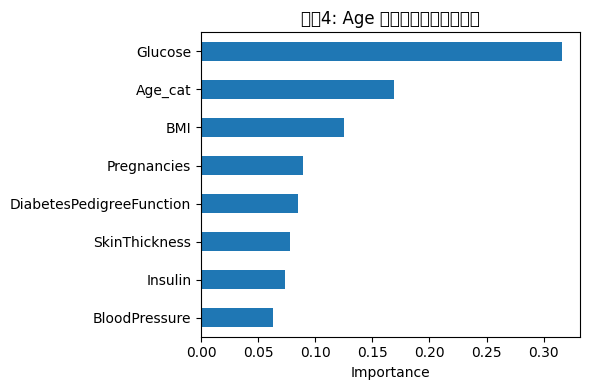

Accuracy: 0.818

考察: カテゴリに変換した Age_cat の重要度が高く出る傾向にある（high-cardinality バイアス）。


In [17]:
# 実験4（発展）: Age をカテゴリ変数に変換
X4 = X0.copy()
# Age を 10 ビンのカテゴリに変換（高 cardinality）
X4["Age_cat"] = pd.cut(X4["Age"], bins=10, labels=False)
X4 = X4.drop(columns=["Age"])
imp4 = fit_and_plot(X4, y, "実験4: Age をカテゴリ変数に変換")
print("考察: カテゴリに変換した Age_cat の重要度が高く出る傾向にある（high-cardinality バイアス）。")


全体の簡単なまとめ
無関係ノイズ は重要度ゼロ→モデルは無視

似た変数を追加 すると，元変数の重要度が類似変数と分散

多数の類似変数 では，個々の重要度がより小さく分散

連続→カテゴリ 変換すると，high-cardinality バイアスで重要度が高く見積もられやすい